# **Cat and Dog Image Project Report**


### **Abstract**

In this project we use a balanced dataset of human labeled cat and dog images and build images classifiers that predict whether an inferenced image contains a cat or a dog. We develop and compare two main methods of image classifier construction: manual feature extraction with a classification algorithm and neural networks (custom and prebuilt). Our goal was to examine the accuracy of traditional classification methods with more robust deep methods. Our experiments demonstrate that while CNNs provide a competitive alternative with robust performance compared to manual feature extraction and classification, our best performance came form transfer learning with ResNet. Our finetuned ResNet50 significantly outperforms other models, achieving the highest accuracy and robustness in classification.

### **Introduction**

The cat-dog image project explores the field of domain specific image classification. This task is preformed quickly and accurately by humans, however remains difficult for computers. The signifigance of this project is to help develop methods of classifying subjects that possess many the ineherent similarites (4 legs, hairy bodies, similar face structure) and exist in similar environments (inside houses, on grass, next to humans). We adopt the tools of manual image feature extraction to classify images in our dataset. Additionally we apply neural networks (CNNs and a pretrained ResNet) to solve the task given their ability to learn which features matter when classifying the images. We preprocess the data, propose several feature extracting techniques (BRISK and HOG) and ML models (KNN, SVC, RF) and compare our results to the NN methods.

### **Background**

Image classification is a fundamental computer vision task that involves categorizing images given their predefined label. While the applications of image classification expand to tasks suchs as object detection and facial recognition, the scope of this project is to examine the techniques and recreate the successes posed in the Cat vs Dog image classification challenge.

Earlier appoaches to image classification involve first applying a method of image feature extraction and then using a classifier algorithm to match features to labels. We attempt several methods of feature extraction and classifier alogrithms and compare our results.

Later on deep learning was adopted for solving image classification tasks. Convolution Neural Networks are designed for processing spacial grid data like images and their inherent abilty to detect complex local patterns like edges, textures, and features with convolutions layers. As such we do not need to determine which features to extract out of each image and the model "learns" the necessary features on the way. We apply a multilayer CNN to the task of Cat and Dog image classification.

Finally we apply ResNet-50 as pretrained deep model using residual blocks and convolutional layers to build a very advanced deep learning architecture with success in deep learnin tasks.  Using the fastai deep learning library we were able to finetune the model and get excellent performance in our cat and dog image classification task.

### **Data**

Our data gathered here (https://www.microsoft.com/en-us/download/details.aspx?id=54765) consists of 25,000 images balanced evenly between cats and dogs. This Kaggle data is a subset of data gathered for Microsoft Research through Asirra (Animal Species Image Recognition for Restricting Access) that works by asking users to identify photographs of cats and dogs.  

As seen below in a sample of the training dataset, the cats and dogs are present in many different orientations, sizes, and colors in various environments and perfroming differnet tasks. The goal for this classifier is to track the import characterists that separate a cat from a dog and ignore the extraneous background information.  

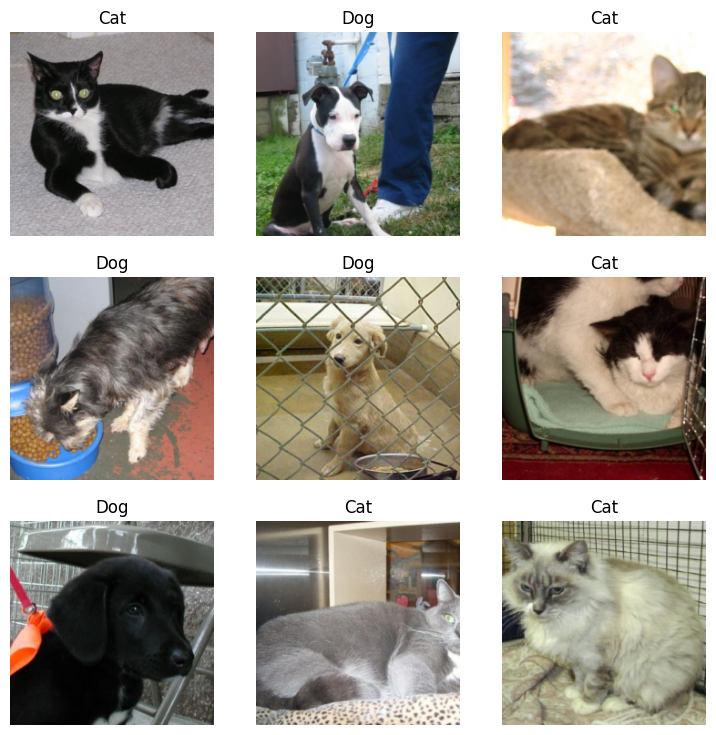


We built our training set out of the first 11,000 images of each catergory (22,000 total).
We built our validation set out of the next 1,000 images of each category (2,000 total).
We built our testing set out of the last 500 images of each category (1,000 total). 

In the preprocessing step, some empty or small image files we discovered and discarded from the training set, in total 6 each of cats and dogs were removed. 

![Splitting the dataset](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/split.png?raw=true)

### **Methods**

Color Images - Images were resized to dimensions of 128x128 pixels and then flattened them, using all features for comprehensive analysis.


![Color Images Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/color_images_cat.png?raw=true)

![Color Images Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/color%20images_dog.png?raw=true)


Pixel Intensity: Pixel intensity refers to the brightness or darkness of a pixel in an image. We added pixel intensity as a feature in our model to evaluate if it improves the results.



Canny Edge Detection - Identifies edges in an image by detecting significant changes in pixel intensity and then tracing the outlines of objects within the image based on these detected changes. And it was to assess its potential to enhance the outcome.

![Edge Canny - Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/canny_edge%20detection.png?raw=true)


![Edge Canny - Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/canny_edge_dog.png?raw=true)



Gaussian Blur: This step smoothed the image to reduce noise, which helped in better edge detection. 
In the image below, the Gaussian Blur helped get better edge distiction in the images but did not imporve the accuracy significantly.
The edge features extracted by Canny edge detection might not provide additional discriminative information beyond what is already captured by the raw pixel values.

![Edge Canny and Gaussian Blurr- Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/Gaussian_blurr.png?raw=true)

![Edge Canny and Gaussian Blurr2- Cat](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/edge_after_gaussian.png?raw=true)

![Edge Canny and Gaussian Blurr- Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/gausian%20blur%20and%20edge%20dog.png?raw=true)

![Edge Canny and Gaussian Blurr2- Dog](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/gaussianblur%20and%20edge%20dog2.png?raw=true)


**BVOW**  

Bag of Visual Words is a method of image classification that builds a "vocabulary" of BRISK features to classify an image. When used for binary image classification, histograms of features are created to represent each image and a comparison between the classes using a KNN classifier is applied. The output is a predictor that will extract the feature "vocabulary" from the inferenced image and return a class prediction.

These are a histograms of feature frequencies of a cat and a dog image in the validation set. The frequencies are how often they show up in a specific image and the visual word index corresponds to a BRISK feature measured in original image.

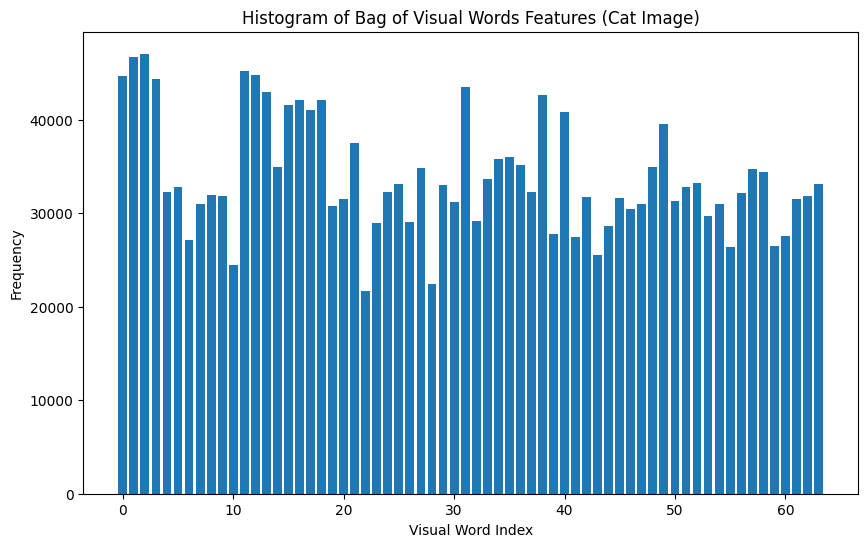
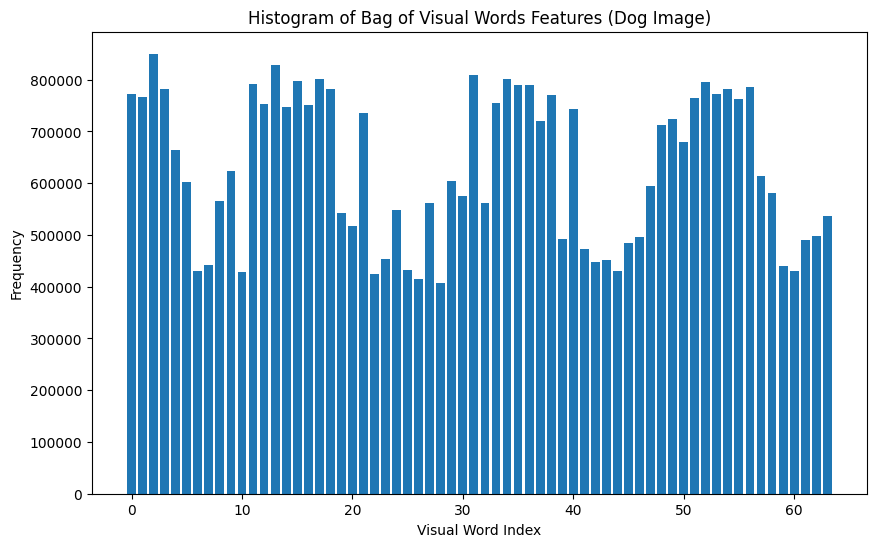

These histograms are grouped using KNN to build a classifier between cat and dog images. 
The resulting accuracy of this BOVW clkassifier was 67.5% and the corresponding confusin matrix shows that this method is a little better at recognizing a cat image vs a dog image.

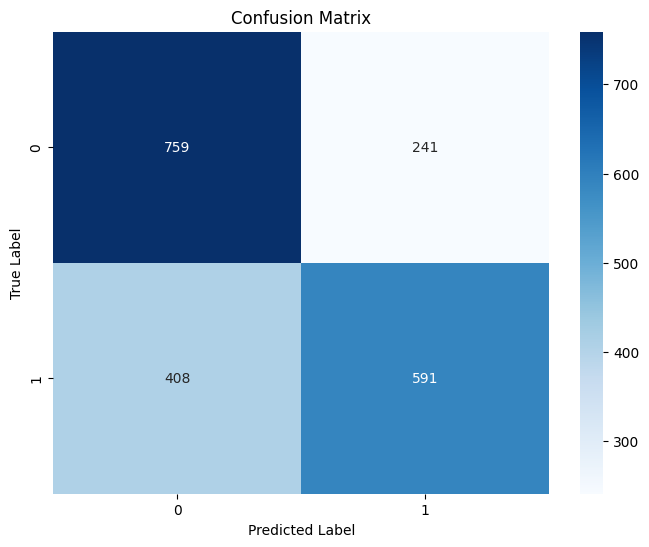

The AUC-ROC is 0.675 and the ROC curve shows it is performing better than a coin flip yet worse than other methods we have developed.

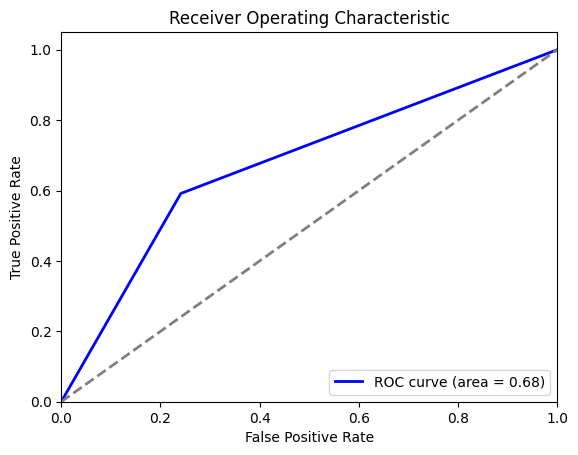

RGB

Using Skimage (scikit-image), in each function all images with dimensions of 128x128 pixels are resized, resorting to image division corresponding to their RGB distribution, in which a color image is taken and divided into three dimensions, one for red colors, another green and blue, where each pixel value can be taken as the color intensity value in that position, and subsequently perform a series of transformations to each channel individually.

![RGB Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/RGB.png?raw=true)

Histogram of RGB Channels

A histogram is made of each color channel, which describes the intensity of the color (0 to 255) and the number of pixels that have that intensity; Obtaining a total of 20 bins for each histograms.

![Histogram Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/histo.png?raw=true)

HSV

The HSV (Hue, Saturation, Value) Hue space extracts color representations measured in degrees where 0° is red, 120° is green, and 240° is blue. Saturation represents the intensity or purity of the color and is measured from 0 to 100%, and value represents the brightness of the color. This characteristic is useful for determining image borders.

![HSV Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/hsv.png?raw=true)

LAB

(also known as CIELAB or Lab) separates luminance information (L) from color components (a and b*), luminance is separated from color components, allowing brightness to be manipulated without affecting color and vice versa

![LAB Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/lab.png?raw=true)

HOG

(Histogram of Oriented Gradients), used for the detection and recognition of objects in images, describes the edges and shape through the intensity of gradients of a dense region of the image, evaluating the difference between the pixels of each cell and again grouping the cells by blocks and finally the normalized histograms of all the blocks are concatenated to form the final HOG descriptor.

number of horizontal cells = 128/8

number of vertical cells = 128/8

Therefore, the image is divided into a total of 16 x 16 = 256 cells.

number of horizontal blocks=16−2+1=15

number of vertical blocks=16−2+1=15

Therefore, we have a total of 15 x 15 = 225 blocks.

Each block has 2x2 cells, and each cell has 9 bins of orientations:

number of features per block=2×2×9=36

total number of features=225 blocks×36 features per block=8100

![HOG Features](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/hog.png?raw=true)

StandardScaler is used to standardize features by removing the mean and scaling to unit variance. It is used to ensure that each feature contributes equally to the Euclidean distance in distance-dependent machine learning algorithms such as SVM, k-NN, by calculating the mean and standard deviation of each feature in the training set and then transforming these values so that each characteristic has a mean of 0 and a standard deviation of 1.

**Best PCA**

PCA (Principal Component Analysis) dimensionality reduction is used to transform the data set, due to having too many dimensions, into a set with fewer dimensions while retaining most of the variability in the original data. PCA allows for model simplification, noise removal, and improved data visualization.

![Best PCA](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/pca.png?raw=true)

Best PCA on different features

The different features of the dataset have been evaluated to determine the best PCA according to a cumulative explained variance corresponding to 95%, or similar analysis to the elbow method, establishing a reduction of variables while retaining the variability present in the dataset, for features coming from histograms reducing between 20 and 40 features; and for features coming from pixel intensity values in terms of color and edges of around 200 to 400 features extracted.

![Features PCA](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/pca_features.png?raw=true)

**GRID SEARCH**

Hyperparameter tuning was performed for different machine learning algorithms such as K-Nearest Neighbors (KNN), Support Vector Machine (SVM) and Random Forest (RF) using grid search, obtaining the best results on the validation set:

SVC : C: 100, gamma: 0.001, kernel=rbf, with enable probability estimation

KNN: n_neighbors: 2, weights: distance

RF: criterion: entropy, max_depth: 20, n_estimators: 250

Performing ROC AUC we evaluate the three classification models, which obtain values ranging from 0 to 1, where a higher value indicates better performance, evaluating the different features of the dataset in terms of how well the class dogs are distinguished from cats.

![SVC KNN RF](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/val_class.png?raw=true)

Validation ROC curve with HOG features

The three classification models are compared for HOG features because it is the one that shows the best results, compared to the other image preprocessing features for training and validation dataset, applying Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC), in which obtaining values close to 0.5 indicates that the model classifies randomly. Values close to 1 indicate that it is a model that classifies all instances. With the SVC classifier, an ROC AUC of 0.8 is obtained, which is considered a fairly solid performance and suggests that the model has a good discrimination capacity between the classes of dogs and cats.

The curve obtained by the three classifiers should tend to cover the upper left part of the threshold; however, it should be noted that the curve obtained by the SVC tends to have a larger value in the upper left part of the threshold, so it tends to have a greater area under the curve.

![ROC AUC HOG](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/roc_val.png?raw=true)

**Esemble methods**

Unifying the set of classification models (SVC, KNN, RF), two ensemble methods are used; the first is Voting (soft), in which the base models are trained independently, and then their predictions are combined, averaging the probabilities of belonging to each class and choosing as the final prediction the probability with the highest vote.

The second model is Gradient Boosting Machines (GBM), in which the classification models are trained sequentially. Each model focuses on adjusting the residuals of the previous models, gradually improving the performance of the model.

For the HOG features, a higher accuracy score is still observed, where the voting method presents better results compared to the Boosting method.

![Validation Ensemble methods](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/val_ensem.png?raw=true)

**Testing Ensemble methods**

The performance of the ensemble methods is evaluated on the test set, where a slightly better performance is observed compared to the validation set, obtaining differences of +/- 0.05.

![Test voting stacking cl](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/test_ensem.png?raw=true)

The classification of the binary class from HOG features through Voting method (SVC, KNN, RF classifiers) obtained training set accuracy: 69%, validation set accuracy: 71% and test set accuracy: 83%, is evaluated with ROC AUC.

![ROC AUC test HOG](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-cat-image-detection/blob/main/src/visualization/roct_test.png?raw=true)

**Convolutional Neural Network (CNN)** 

Convolutional Neural Networks (CNNs) are particularly well suited for image classification due to their ability to capture and learn spatial features and patterns within images. Through convolutional layers, CNNs can automatically extract relevant features from images without the need fro intensice manual preprocessing.

In this case to create the CNN a sequential model was created with convolutional layers, pooling layers, a flattening layer and dense layers. The ReLU activation function was used in the convolutional layerts and sigmoid in the output layer. The model was compiled with the adam optimizar and binary_crossentropy loss function, using accuracy as the evaluation metric.

In the first step we create a simple model using a CNN with 2 convolutional layers. After training the model performance we obtained
Training Set Accuracy: 85.05%
Validation Set Accuracy 81.52%

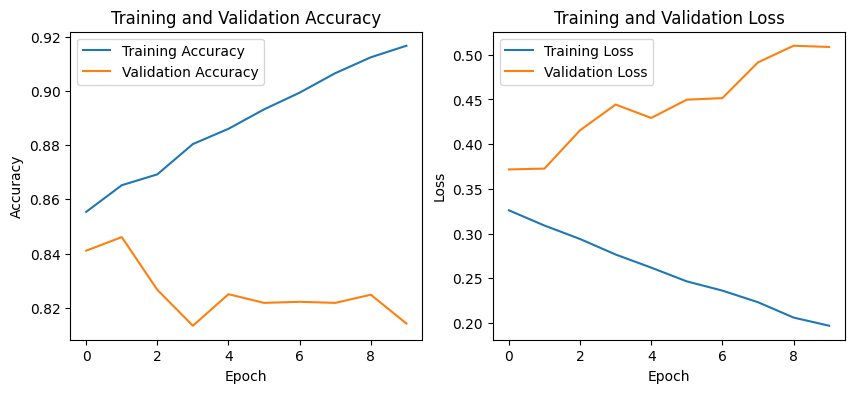

**CNN & Data Augmentation**

Although the performance of the initial model with 2 convolutional layers was relatively good, there is room for improvement. One of the main concerns is overfitting, where the model performs well on training data but does not generalize well on validation data. Data Augmentation involves generating new training data samples from existing ones by means of various transformations, such as rotations, translations, flips, scaling and others. By generating new samples, the size of the training data set is effectively increased, allowing the model to have more data to learn.

Although our Validation Set Accuracy validation does not give us a better score, we can see how the overfitting is reduced considerably. After training the model performance we obtained
Training Set Accuracy: 91.12%
Validation Set Accuracy 81.52%

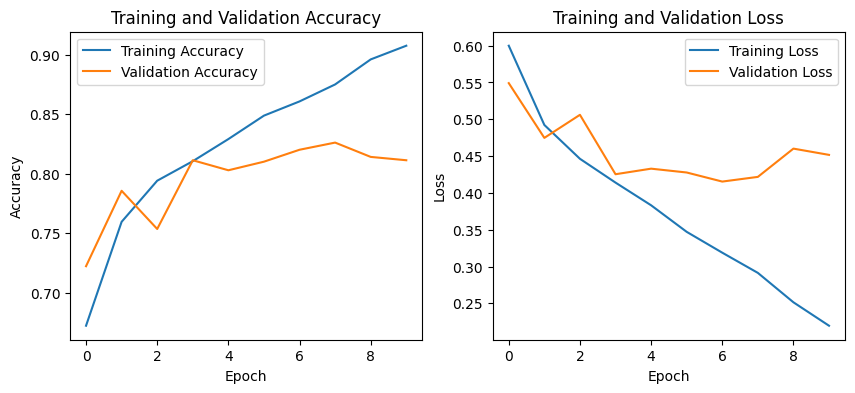

**CNN & Adding a Covolutional Layer**

To improve the performance of the initial model, we decided to see what results we could obtain by adding an additional convolutional layer to the model. The intent of this modification was to increase the model's ability to learn more complex features and potentially improve its accuracy and generalization capability. By adding an additional convolutional layer, we expect the model to be able to capture more complex features and improve its overall performance. The graphs below show the accuracy and loss during training and validation. After training the model performance we obtained
Training Set Accuracy: 93.68%
Validation Set Accuracy: 84.25%


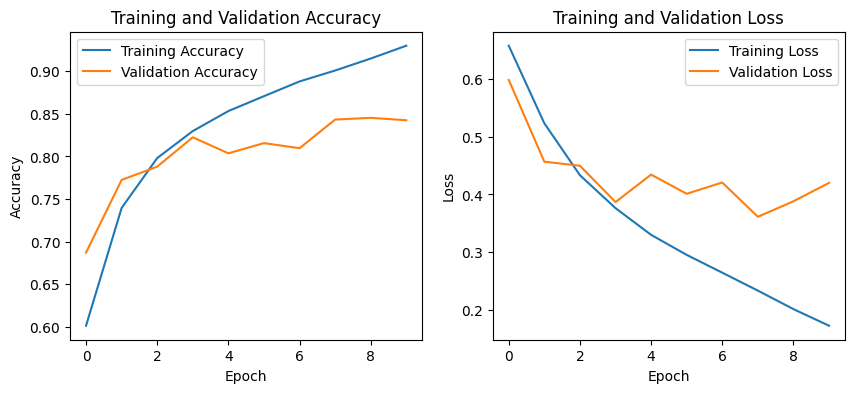

**ResNet50** 

To create the most accurate classifier we adapted the pretrained image model ResNet50. Running the base model on our data produced essential coinflip results. With some finetuning on out training set, the ResNet50 model performed the best on our validation and testing sets.

The pretrained model is saved as a pkl file and can be downloaded: https://drive.google.com/file/d/1lc6Y0jCu1w9UaINiOTS52NUdXM9d9vRA/view?usp=drive_link

The following accuracy measurements were as follow
Training Set Accuracy: 99.68%
Validation Set Accuracy 99.35%
Test Set Accuracy: 99.40%

The accompanying ROC Curve and Confusion Matrix also describe a model that can classify cat and dog images with a very high accuracy and true positive rate and very low false positive rate. 

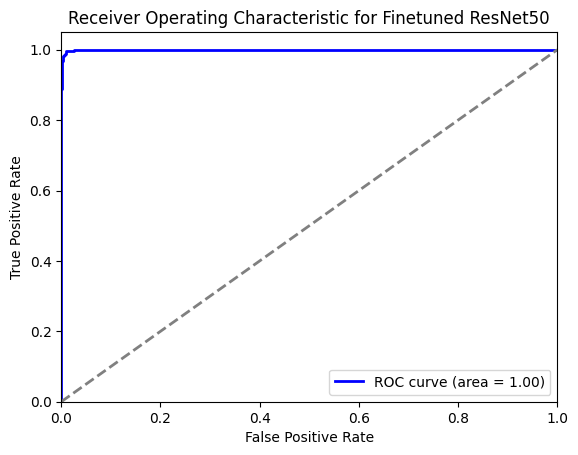

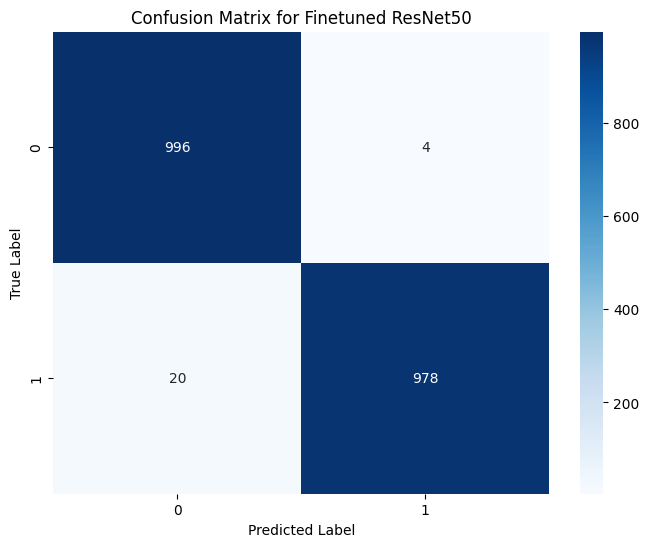

### **Conclusion**

For the classification of images, a comprehensive feature extraction process was implemented using various image processing techniques. The extracted data included values of color intensity, luminescence, edge information, color saturation, and pixel values. These features were obtained using methods such as Canny Edge Detection, Pixel Detection, RGB channels, HSV, LAB Channels, HOG features, and BRISK features with BVOW (Bag of Visual Words).

The purpose of extracting these features was to compare different characteristics and evaluate their effectiveness in classification models like SVC (Support Vector Classifier), KNN (K-Nearest Neighbors), and RF (Random Forest) to determine which model achieved the best performance.

A significant aspect of the image classification and preprocessing process was addressing the heterogeneity of the images. It was crucial to identify the optimal feature extraction method, as images varied in terms of saturation, contrast, color quality, and graphic detail. This variability made it essential to adapt the feature extraction techniques to ensure robust and accurate image classification.

Evaluation of several machine learning classification models generated accuracy results ranging from 60% to 70%. This performance provided a basis for further tuning through hyperparameter optimization. Ensemble methods were implemented to improve the performance of the model, integrating the normalization, feature extraction, and classification processes, which allowed SVC to be identified as the classifier with the highest accuracy, evaluated with ROC AUC. Specifically, Voting (soft) and Boosting (GBM) methods were used to unify and enhance these processes, highlighting the performance of the first method with accuracy values close to 80% using HOG features.

Finally, the application of machine learning techniques focused on identifying the best feature (HOG), resulting in higher precision values for SVC compared to KNN and RF. Among the ensemble methods, Voting outperformed Boosting, achieving an accuracy score of 83% on the test set. This success paved the way for the implementation of deep learning models, specifically Convolutional Neural Networks (CNN) and ResNet-50.


### **Attribution**

Using the number and size of GitHub commits by author (bar graph), and the git hub visualizations of when the commits occurred. Using these measures each person should self-report how many code-hours of their work are visible in the repo with 2-3 sentences listing their contribution. Do not report any code hours that cannot be traced to commits. If you spend hours on a 2-line change of code or side-reading you did, you cannot report. If you do searches or research for the project that does not result in code, you must create notes in a markdown file (eg. in the project wiki) and the notes should be commensurate with the amount of work reported. Notes cannot be simply copy-pasted from elsewhere (obviously).

### **Bibliography**

Raschka, Sebastian, Yuxi Liu, Vahid Mirjalili, and Dmytro Dzhulgakov. Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python. Expert Insight. Birmingham Mumbai: Packt, 2022.

Shalev-Shwartz, Shai, and Shai Ben-David. Understanding Machine Learning: From Theory to Algorithms. New York, NY: Cambridge University Press, 2014.

Hastie, Trevor, Robert Tibshirani, and J. H. Friedman. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd ed. Springer Series in Statistics. New York, NY: Springer, 2009.
